INTRODUCTION

The Titanic dataset provides a glimpse into one of history's most infamous maritime disasters, offering insights into the passengers' demographics and characteristics and their likelihood of survival. In this analysis, we aim to leverage machine learning techniques to answer the question of what sorts of people were more likely to survive the disaster. By implementing an ensemble model utilizing one of the Voting, Bagging, or Boosting approaches, and comparing its performance with two single models chosen from decision tree, naïve Bayes, KNN, logistic regression, SVM, and MLP, we seek to identify the most effective predictive model for this dataset. Through this exploration, we can gain valuable insights into the socio-economic dynamics of the Titanic's passengers and draw lessons that may inform future disaster preparedness efforts.

DATA UNDERSTANDING AND PREPROCESSING

1. Conduct exploratory data analysis (EDA) to understand the structure and characteristics of the dataset. This includes examining the dimensions of the dataset, viewing the first few rows, checking for missing values, and summarizing the numerical and categorical features.

2. Handle Missing Values: Deal with missing values in the dataset, as missing data can adversely affect model performance. Options for handling missing values include imputation (e.g., replacing missing values with the mean or median) or deletion (e.g., removing rows or columns with missing values).

3. Split the dataset into training and testing sets to assess model performance on unseen data. Typically, the dataset is divided into a training set (used to train the model) and a testing set (used to evaluate the model's performance).

VARIABLES DESCRIPTION

PassengerId: Unique identifier for each passenger.

Survived: Indicator of whether the passenger survived (1) or not (0).

Pclass: Socio-economic class of the passenger (1st, 2nd, or 3rd).

Name: Name of the passenger.

Sex: Gender of the passenger (male or female).

Age: Age of the passenger.

SibSp: Number of siblings/spouses aboard the Titanic.

Parch: Number of parents/children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

UPLOAD AND CLEAN DATA

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # Try to use this in the exercise
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Read titanic data

In [ ]:
titanic = pd.read_csv("/content/drive/MyDrive/IS670_data/Titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Examine variable types

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Change categorical variables to "category"

In [ ]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')

Examine variable types

In [ ]:
titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

Examine the missing values

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing values

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing age values with the median age
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

# Drop the 'Cabin' column
titanic.drop(columns=['Cabin'], inplace=True)




Prepare data set for classification

Create Dummy variables

In [ ]:
titanic = pd.get_dummies(titanic, columns=['Pclass','Embarked','Sex'], drop_first=True)
titanic

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,True,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,False,True,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,False,True,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,True,False,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,False,False,False,True


Partition the data

In [ ]:
target = titanic['Survived']
predictors = titanic.drop(['Survived'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(623, 12) (268, 12) (623,) (268,)


Examine the porportion of target variable for training data set

In [ ]:
print(target_train.value_counts(normalize=True))

Survived
0    0.611557
1    0.388443
Name: proportion, dtype: float64


Examine the porportion of target variable for testing data set

In [ ]:
print(target_test.value_counts(normalize=True))

Survived
0    0.626866
1    0.373134
Name: proportion, dtype: float64


MODEL DEVELOPMENT

Voting ensemble prediction

Create 5 learners

In [ ]:
estimators = []
learner_1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
estimators.append(("Decision_Tree", learner_1))
learner_2 = MLPClassifier(hidden_layer_sizes=(16, 8, 8), random_state=1, solver= 'adam', activation='relu',alpha=0.0001)
estimators.append(("MLP", learner_2))
learner_3 = MLPClassifier(hidden_layer_sizes=(64, 32, 8), random_state=1, solver= 'adam', activation='relu',alpha=0.0001)
estimators.append(("MLP1", learner_2))
learner_4 = LogisticRegression(C= 10, solver=  'lbfgs')
estimators.append(("LR", learner_4))
learner_5= SVC(C=1000)
estimators.append(("SVM1",learner_5))

Performing column transformation and creating a voting model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming predictors_train and target_train are your feature and target datasets respectively

# Identify numeric and categorical columns
numeric_features = predictors_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = predictors_train.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into train and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

model_voting = VotingClassifier(estimators)

# Fit the preprocessing steps and the VotingClassifier together using Pipeline
predictors_train_processed = preprocessor.fit_transform(predictors_train)
model_voting.fit(predictors_train_processed, target_train)

# Evaluate the model
predictors_test_processed = preprocessor.transform(predictors_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Make predictions on testing data

Examine the evaluation results on testing data: confusion_matrix

Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       168
           1       0.74      0.53      0.62       100

    accuracy                           0.75       268
   macro avg       0.75      0.71      0.72       268
weighted avg       0.75      0.75      0.74       268



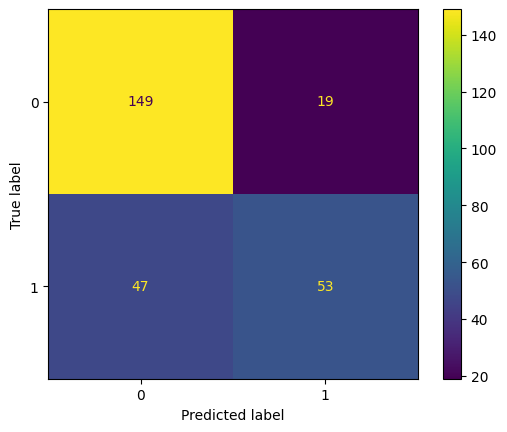

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

target_pred = model_voting.predict(predictors_test_processed)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)


Voting ensemble model gives the overall accuracy of 75%.

Bagging ensemble prediction

Bagging based on MLP model

Make predictions on testing data

Examine the evaluation results on testing data: confusion_matrix

Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochasti


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       168
           1       0.74      0.57      0.64       100

    accuracy                           0.76       268
   macro avg       0.76      0.73      0.73       268
weighted avg       0.76      0.76      0.76       268



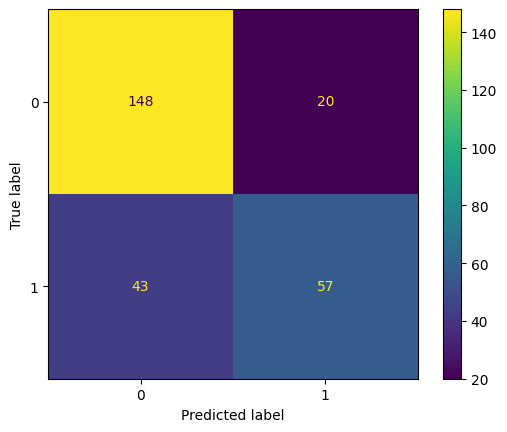

In [ ]:
model_bagging = BaggingClassifier(base_estimator = MLPClassifier(hidden_layer_sizes=(16, 8, 8), random_state=1, solver= 'adam', activation='relu',alpha=0.0001),n_estimators=5, random_state=1)
model_bagging.fit(predictors_train_processed, target_train)

target_pred = model_bagging.predict(predictors_test_processed)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)

Bagging ensemble model gives the overall accuracy of 76%.

Boosting ensemble prediction

Boosting based on Logistic Regression model

Make predictions on testing data

Examine the evaluation results on testing data: confusion_matrix

Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       168
           1       0.84      0.36      0.50       100

    accuracy                           0.74       268
   macro avg       0.78      0.66      0.66       268
weighted avg       0.76      0.74      0.70       268



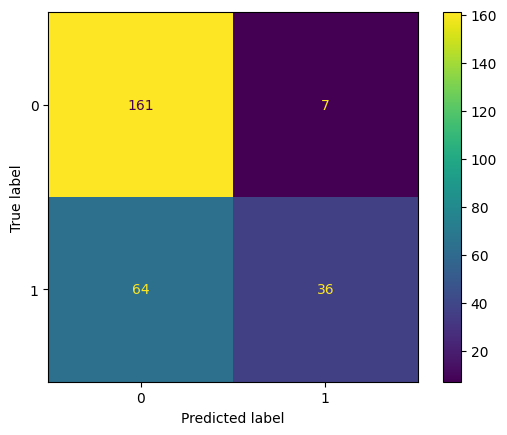

In [ ]:
model_boosting = AdaBoostClassifier(base_estimator = LogisticRegression(C= 150, solver=  'lbfgs'),n_estimators=5, random_state=1)
model_boosting.fit(predictors_train_processed, target_train)

target_pred = model_boosting.predict(predictors_test_processed)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)

Boosting ensemble model gives the overall accuracy of 74%.

COMPARISON WITH 2 SINGLE MODELS

Comparing with Decision Tree Model


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       168
           1       0.79      0.41      0.54       100

    accuracy                           0.74       268
   macro avg       0.76      0.67      0.68       268
weighted avg       0.75      0.74      0.71       268



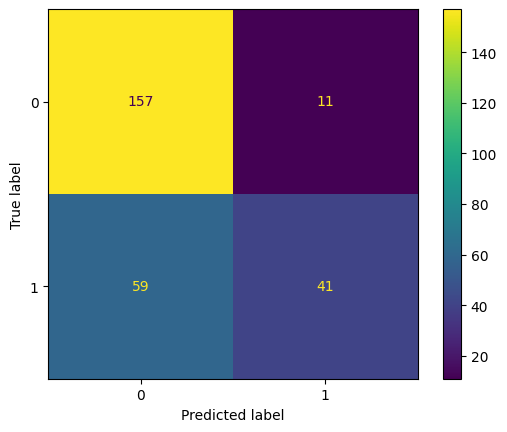

In [ ]:
model_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 4)
model_tree.fit(predictors_train_processed, target_train)

target_pred = model_tree.predict(predictors_test_processed)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)

Decision Tree model gives the overall accuracy of 74%.

Comparing with SVC Model


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       168
           1       0.77      0.43      0.55       100

    accuracy                           0.74       268
   macro avg       0.75      0.68      0.68       268
weighted avg       0.74      0.74      0.72       268



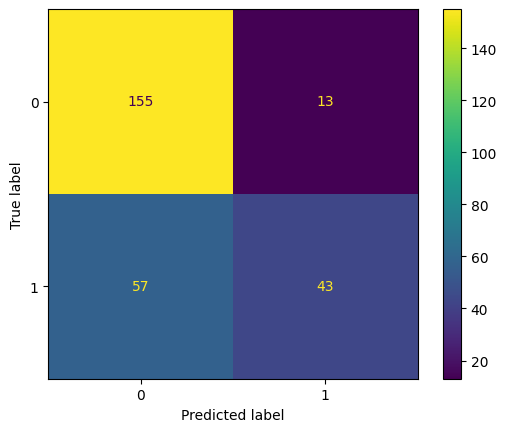

In [ ]:
model_svc = SVC(C = 8500)
model_svc.fit(predictors_train_processed, target_train)

target_pred = model_svc.predict(predictors_test_processed)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)

SVC model gives the overall accuracy of 74%.

COMPARISON OF ENSEMBLE MODELS WITH DECISION TREE AND SVC MODEL

The **bagging ensemble model**, consisting of a Decision Tree, two Multi-Layer Perceptron (MLP) classifiers, Logistic Regression, and Support Vector Machine (SVM), attained an accuracy of **76%.** This model demonstrates promising precision, recall, and F1-scores for class 0 (0.77, 0.88, and 0.82 respectively) and class 1 (0.74, 0.57, and 0.64 respectively). This indicates the effectiveness of combining multiple classifiers to enhance overall predictive performance.


In comparison to the **voting ensemble model, which achieved an accuracy of 75%**, the bagging ensemble model performed slightly better with an accuracy of 76%. While both models exhibited similar precision for class 0 (0.76 for the voting ensemble model, 0.77 for the original ensemble model), the bagging ensemble model had a slightly higher precision for class 1 (0.74 compared to 0.74). However, the voting ensemble model demonstrated higher recall for class 1 (0.53 compared to 0.57) and a slightly higher F1-score overall (0.72 compared to 0.73).

On the other hand, the **boosting ensemble model achieved an accuracy of 74%**, slightly lower than both the bagging ensemble and voting ensemble models. It displayed strong precision for class 1 (0.84), indicating its ability to accurately identify positive cases. However, its recall for class 1 was relatively lower (0.36), resulting in a lower F1-score overall (0.50). In contrast, the bagging ensemble model showed a balanced performance with comparable precision and recall for both classes, resulting in a higher F1-score (0.64).

Overall, while the boosting ensemble model exhibited high precision for class 1, its lower recall led to a less balanced performance compared to the original ensemble model. The voting ensemble model showed competitive performance with a slightly higher F1-score than the original ensemble model, highlighting the effectiveness of combining diverse classifiers in the ensemble approach.

In comparison, the **Decision Tree model with a depth of 4** achieved an accuracy of 74%. While its precision and F1-scores were competitive (0.73 for class 0, 0.82 for both classes), its recall for class 1 (0.41) was relatively lower.

Similarly, the **SVC model with C=8500** also achieved an accuracy of 74%. Although it displayed good precision and F1-scores (0.73 for class 0, 0.82 for both classes), its recall for class 1 (0.43) was suboptimal.

Overall, the **bagging ensemble model outperformed the individual models**, particularly in terms of recall for class 1. However, the individual models also showcased competitive performance, suggesting that they could be viable options for specific use cases or in combination with other models. The ensemble approach leverages the diversity of multiple classifiers to mitigate weaknesses and enhance predictive accuracy, making it a valuable technique in machine learning.

EXTRA CREDIT

Comparison with different ensemble models

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       168
           1       0.80      0.47      0.59       100

    accuracy                           0.76       268
   macro avg       0.77      0.70      0.71       268
weighted avg       0.77      0.76      0.74       268



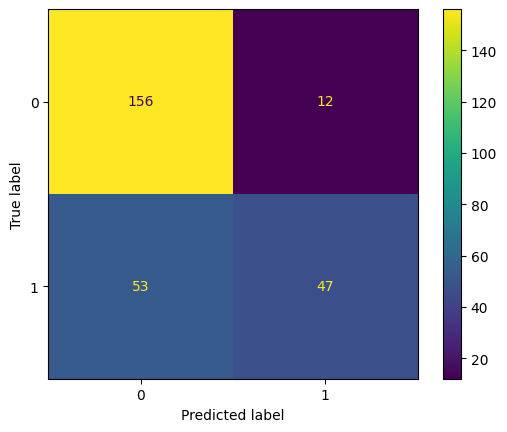

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

estimators = []

learner_1 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=4)
estimators.append(("Decision_Tree", learner_1))

learner_2 = MLPClassifier(hidden_layer_sizes=(16, 8, 8), random_state=1, solver='adam', activation='relu', alpha=0.0001)
estimators.append(("MLP", learner_2))

learner_3 = MLPClassifier(hidden_layer_sizes=(64, 32, 8), random_state=1, solver='adam', activation='relu', alpha=0.0001)
estimators.append(("MLP1", learner_3))

learner_4 = LogisticRegression(C=15, solver='lbfgs')
estimators.append(("LR", learner_4))

learner_5 = SVC(C=150)
estimators.append(("SVM1", learner_5))

learner_6 = RandomForestClassifier(n_estimators=100, random_state=0)
estimators.append(("RF", learner_6))

learner_7 = AdaBoostClassifier(n_estimators=50, random_state=0)
estimators.append(("Ada", learner_7))

learner_8 = GradientBoostingClassifier(n_estimators=50, random_state=0)
estimators.append(("GB", learner_8))

voting = VotingClassifier(estimators)

voting.fit(predictors_train_processed, target_train)

target_pred = voting.predict(predictors_test_processed)
accuracy = accuracy_score(target_test, target_pred)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)



Ensemble model with 8 learners produced an accuracy of 76%.


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       168
           1       0.78      0.46      0.58       100

    accuracy                           0.75       268
   macro avg       0.76      0.69      0.70       268
weighted avg       0.76      0.75      0.73       268



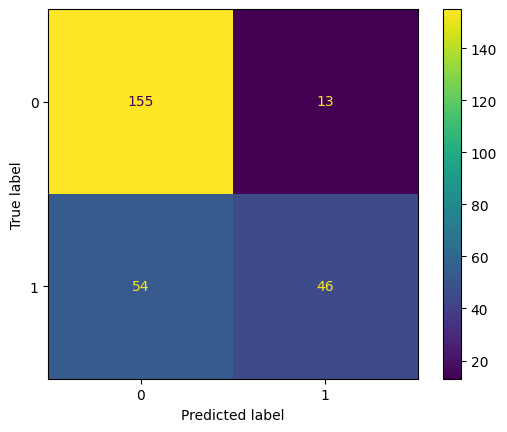

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import pandas as pd

estimators = []

learner_1 = RandomForestClassifier(n_estimators=50, random_state=0)
estimators.append(("RF", learner_1))

learner_2 = AdaBoostClassifier(n_estimators=10, random_state=0)
estimators.append(("Ada", learner_2))

learner_3 = GradientBoostingClassifier(n_estimators=10, random_state=0)
estimators.append(("GB", learner_3))

voting = VotingClassifier(estimators)

voting.fit(predictors_train_processed, target_train)

target_pred = voting.predict(predictors_test_processed)
accuracy = accuracy_score(target_test, target_pred)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)


Ensemble model with 3 learners produced an accuracy of 75%.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       168
           1       0.89      0.32      0.47       100

    accuracy                           0.73       268
   macro avg       0.80      0.65      0.65       268
weighted avg       0.77      0.73      0.69       268



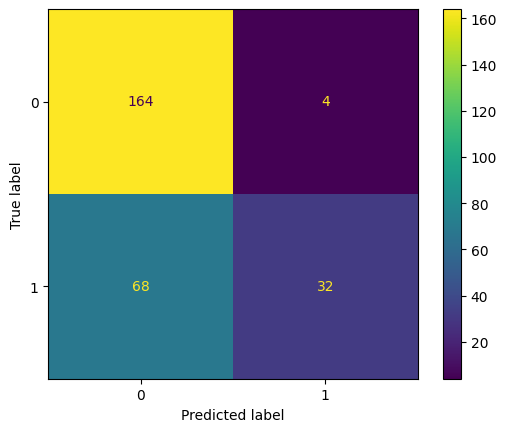

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

# Assuming predictors_train_processed, predictors_test_processed, target_train, target_test are defined

estimators = []

learner_1 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3)
estimators.append(("Decision_Tree", learner_1))

learner_2 = MLPClassifier(hidden_layer_sizes=(32, 8, 4), random_state=1, solver='adam', activation='relu', alpha=0.0001)
estimators.append(("MLP", learner_2))

learner_3 = KNeighborsClassifier(n_neighbors = 8)
estimators.append(("KNN", learner_3))

learner_4 = LogisticRegression(C=50, solver='lbfgs')
estimators.append(("LR", learner_4))

learner_5 = SVC(C=150)
estimators.append(("SVM1", learner_5))

learner_6 = RandomForestClassifier(n_estimators=100, random_state=0)
estimators.append(("RF", learner_6))

voting = VotingClassifier(estimators)

voting.fit(predictors_train_processed, target_train)

target_pred = voting.predict(predictors_test_processed)
accuracy = accuracy_score(target_test, target_pred)

conf_matrix = confusion_matrix(target_test, target_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

class_report = classification_report(target_test, target_pred)
print("\nClassification Report:")
print(class_report)



Ensemble model with 6 learners produced an accuracy of 73%.

Comparing the above 3 ensemble models:

1. Ensemble model with 8 learners:

Accuracy: 76%

Precision for class 0: 75%, class 1: 80%

Recall for class 0: 93%, class 1: 47%

F1-score for class 0: 83%, class 1: 59%

2. Ensemble model with 3 learners:

Accuracy: 75%

Precision for class 0: 74%, class 1: 78%

Recall for class 0: 92%, class 1: 46%

F1-score for class 0: 82%, class 1: 58%


3. Ensemble model with 6 learners:

Accuracy: 73%

Precision for class 0: 71%, class 1: 89%

Recall for class 0: 98%, class 1: 32%

F1-score for class 0: 82%, class 1: 47%

The **ensemble model with 8 learners achieved an accuracy of 76%**, indicating that it correctly classified 76% of the instances in the dataset. It demonstrated relatively high precision for both classes, with 75% for class 0 and 80% for class 1. However, the recall for class 1 was lower at 47%, indicating that it struggled to correctly identify instances of this class. Consequently, the F1-score for class 1 was 59%, suggesting moderate performance.

The **ensemble model with 3 learners achieved an accuracy of 75%**, with precision scores of 74% and 78% for classes 0 and 1, respectively. While the recall for class 1 was slightly lower at 46%, the overall F1-score for this class was 58%, similar to the 8-learner model. This model demonstrated comparable performance to the 8-learner model but with fewer learners.

Lastly, In contrast, **the ensemble model with 6 learners yielded an accuracy of 73%**, slightly lower than the other two models. While its precision rate for class 1 was notably high at 89%, the recall rate for class 1 was considerably lower at 32%. This imbalance impacted the F1-score for class 1, which stood at 47%. Despite achieving a high recall rate for class 0 (98%), the low recall rate for class 1 indicates a challenge in correctly identifying instances of this class.

In conclusion, based on the evaluation of their performance metrics, **the ensemble model with 8 learners appears to be the best model**, as it achieved the highest accuracy and demonstrated relatively balanced precision and recall scores for both classes.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/titanic.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/titanic.ipynb to html
[NbConvertApp] Writing 787419 bytes to /content/drive/MyDrive/Colab Notebooks/titanic.html
